# Классы и объекты

Классы - определенная сущность описывающая какие-либо свойства и методы определенного представления\объекта\предмета

Объект - это конкретный конечный предмет который характерезует описаную сущность с которым мы можем взаимодействовать. Экземпляр класса(объект класса) *имя*

Синтаксис описания класса

```python
class <NameOfClass>:
    def __init__(self):
        self.<attribute> = ...

```

Свойство - или Атрибут класса, это определенная единица характеристики объекта.

ЛЮБОЙ класс, создавемый внутри Python(даже те что уже есть), были созданы от основополагающего класса `object`
Просмотреть это мы можем через обращение именно к КЛАССУ, вызывая метод `mro()`

In [1]:
print(int.mro())

[<class 'int'>, <class 'object'>]


Создадим наш первый класс

In [2]:
class Apple:
    pass

apple = Apple()

print(f'{Apple.mro()=}')
print(f'{apple=}')


Apple.mro()=[<class '__main__.Apple'>, <class 'object'>]
apple=<__main__.Apple object at 0x000002451900D010>


Для того чтобы создать объект класса, после обращения к самому классу мы его вызываем с помощью приписки `()`

Процесс создания экземпляра класса Apple

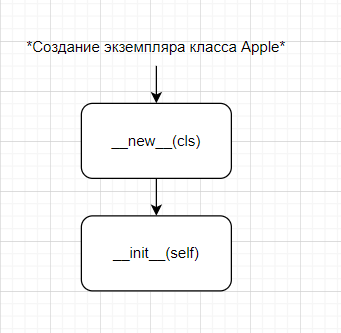

Как мы можем заметить, процесс включает в себя 2 dunder-метода - new и init.New имеет отличный от init указатель. New создает общее представление объекта, не наделяя его конкретными свойствами. Конкретными свойствами его наделит init.

Метод - это определенное действие, которое привязано к объекту и не может выполненно вне его участия. То есть, другими словами это фукнция которая привязана к классу.

self - это обязательный парамер который используется в стандартных методах класса и является УКАЗАТЕЛЕМ на собственный экземпляр класса. Self- переводится "на себя\ себе\ мне". То есть это конструкт который указывает сам на себя

`__init__` -- это dunder(double underline) метод, который НАДЕЛЯЕТ создаваемый объект определенными свойствами. Также, такой метод во всех ЯП(Языках Программирования в дальнейшем) называется **КОНСТРУКТОРОМ** КЛАССА

`__del__` -- этот магический метод(dunder) используется в тот момент когда поисходит удаление объекта. Иными в других ЯП это **ДЕСТРУКТОР** КЛАССА

In [7]:
class Apple():
    def __init__(self):
        self.size: str = 'normal'
        self.color: str = 'red'
        self.taste: str = 'sweet'
        self.fresh = True
    

apple1 = Apple()
apple2 = Apple()

print(f'{apple1 is apple2=}')
print(f'{id(apple1)=} | {id(apple2)=}')
print(apple1)
print(apple2)

        


apple1 is apple2=False
id(apple1)=2495806069328 | id(apple2)=2495803723792


- Свойства объекта можно вызывать и переопределять в любое время
- Также класса мы можем создавать и собственные методы
- Объекты класса по своей сути не являются изменяемыми типами данных, поэтому их можно использовать в ключах dict и как объекты множества. Связано это с тем что объект который создается является КОНЕЧНЫМ относительно оперативной памяти

In [18]:
class Cat:
    def __init__(self, name: str, color: str, size: str = 'normal'):
        self.name = name
        self.size = size
        self.color = color

    def __del__(self):
        print(f'We missed cat {self.name}')
        
    def speak(self):
        print(f'Cat {self.name} says "Meow!"') # когда мы работаем внутри класса, то мы можем использовать только указатель на себя

    def run(self):
        print(f'Cat {self.name} is running')
        
    def jump(self, distance = 1):
        print(f'Cat {self.name} is jumping on {distance} m. distance')
        
    

cat1 = Cat('Tom', 'black')
cat2 = Cat('Bob', 'red')
cat3 = Cat('Molly', 'white')

print(f'{cat1.name=}') # А когда мы работаем с конкретно созданным объектом, мы можем получать параметры обращаясь к самому объекту
print(f'{cat2.name=}')

cat1.jump()
# del cat1 # Удаление объекта cat1
cat1.run()
cat1.speak()

# Переопределим имя для cat2
cat2.speak()
cat2.name = 'Jack'
cat2.speak()

# Когда экземпляров объекта много, и для каждого из них нужно выполнить определенное действие то мы можем наши объекты поместить в другую структуру
# basket_with_cats = [cat1, cat2, cat3]
basket_with_cats = {cat1, cat2, cat3}
print(f'{basket_with_cats=}')
for cat in basket_with_cats:
    cat.speak()


cat1.name='Tom'
cat2.name='Bob'
Cat Tom is jumping on 1 m. distance
Cat Tom is running
Cat Tom says "Meow!"
Cat Bob says "Meow!"
Cat Jack says "Meow!"
We missed cat Tom
We missed cat Molly
We missed cat Jack
basket_with_cats={<__main__.Cat object at 0x0000024519A30210>, <__main__.Cat object at 0x0000024519A31710>, <__main__.Cat object at 0x0000024519A309D0>}
Cat Tom says "Meow!"
Cat Jack says "Meow!"
Cat Molly says "Meow!"


# Перегрузка операторов

Перегрузка операторов -- это изменеие поведения стандртных функций и методов взаимодействия с классом внутри нашего класса

Например `__len__` в cat, должен считать длину кота, ранее этого dunder-метода там не было и соответственно выполнить len для экземпляров класса Cat было невозможно.

- **ВАЖНО** соблюдать те правил которые устанавливает тот или иной dunder мето, например, если `__len__` должен выдавать int значение, то int значение мы и возвращаем(return)

In [20]:
lst = list(range(10))
print(f'{lst=} | {len(lst)=}')

lst=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] | len(lst)=10


In [25]:
class Cat:
    def __init__(self, name: str, color: str, size: int = 1):
        self.name = name
        self.size = size
        self.color = color

    def __del__(self):
        print(f'We missed cat {self.name}')
    
    def __len__(self):
        print(f'We trying get length cat {self.name}')
        return self.size

cat = Cat('Barsik', 'red', size = 2)
cat2 = Cat('Murzik', 'grey', size=4)

cat_len1 = len(cat)
cat_len2 = len(cat2)
print(f'{cat_len1=} | {cat_len2=}')


We missed cat Barsik
We missed cat Murzik
We trying get length cat Barsik
We trying get length cat Murzik
cat_len1=2 | cat_len2=4


### Переопределения математических операций

In [29]:
print(2 + 2)
val = 2
print(val.__add__(2))


4
4


In [30]:
print([2,3] + [4,5])

[2, 3, 4, 5]


In [47]:
class Basket:
    def __init__(self, *args):
        self.inner_items = list(args)
        self.count_of_product: int = len(self.inner_items)
    
    def __len__(self):
        return self.count_of_product

    def __add__(self, other): # оператор сложения 
        print(f'Объект типа {type(other)}')
        if isinstance(other, Basket):
            new_basket = Basket( *(self.inner_items + other.inner_items) )
            return new_basket
    
    def __str__(self): # Выполним переопределение строкификации, по умолчанию выводися  <Имя объекта object at адрес в ОП>
        # Но мы можем изменить это поведение на 
        # НЕ РАБОТАЕТ с f'{Basket()=}'
        return f'Корзина с содержимым: {self.inner_items}'
    
    def __int__(self): # переопределение перевода объекта в int объект
        return self.count_of_product
    # def __repr__(self):
    #     # Это аналог __str__ который работает в режиме debug или другими словами для разработчика а не для конечного пользователя
    #     # т.е. работает при {var=}
    #     return f'Корзина с содержимым: {self.inner_items}'
        
a1, a2, a3 = Apple(), Apple(), Apple()
print(a1 is a2 is a3)

b1 = Basket(a1)
b2 = Basket(a2, a3)

b3 = b1 + b2
print(f'{b3=}| {(b3 is b1) or (b3 is b2)}') 
b3 = b1.__add__(b2)
print(f'{b3=}| {(b3 is b1) or (b3 is b2)}')

print(b3)
print(str(b3))
print(f'{int(b3)=}')
print(f'{int(b1)=}')
print(f'{len(b3)=}')
print(f'Без debug вывода - {b3}')

False
Объект типа <class '__main__.Basket'>
b3=<__main__.Basket object at 0x00000245190223D0>| False
Объект типа <class '__main__.Basket'>
b3=<__main__.Basket object at 0x0000024519011890>| False
Корзина с содержимым: [<__main__.Apple object at 0x000002451B015BD0>, <__main__.Apple object at 0x000002451B017CD0>, <__main__.Apple object at 0x000002451B017C90>]
Корзина с содержимым: [<__main__.Apple object at 0x000002451B015BD0>, <__main__.Apple object at 0x000002451B017CD0>, <__main__.Apple object at 0x000002451B017C90>]
int(b3)=3
int(b1)=1
len(b3)=3
Без debug вывода - Корзина с содержимым: [<__main__.Apple object at 0x000002451B015BD0>, <__main__.Apple object at 0x000002451B017CD0>, <__main__.Apple object at 0x000002451B017C90>]


# Пространство класса

Свойства в классах делятся на 2 вида, классовые и экземплярный(объектные)
- Классове параметры(свойства) общие для всей группы классов
- Экземплярные будут работать только внутри собственного объекта

In [1]:
class Wolf:
    total_count = 0
    
    def add(self):
        self.total_count += 1 # это не влияние на классовый атрибут, это создание total_count внутри экземпляра, и присвоение ему +1
        
    def __init__(self, name):
        self.size = 'normal'
        self.name = name
        
    # Для таких случаем существуют классовые методы
    @classmethod
    def class_addition(cls):
        print('Увеличение значения классового атрибута')
        cls.total_count += 1
        
        
w1 = Wolf('Matt')
w2 = Wolf('Max')
print(w1.total_count, w1.name)
print(w2.total_count, w2.name)

# w1.add()
# print(w1.total_count, w1.name)
# print(w2.total_count, w2.name)

w1.class_addition()
print(w1.total_count, w1.name)
print(w2.total_count, w2.name)

w2.class_addition()
print(w1.total_count, w1.name)
print(w2.total_count, w2.name)

Wolf.class_addition()
print(w1.total_count, w1.name)
print(w2.total_count, w2.name)


0 Matt
0 Max
1 Matt
1 Max
2 Matt
2 Max
3 Matt
3 Max


Как видим при использовании self.<классовый атрибут> + <значение> получаем соотвествующую ошибку, которая МЕНЯЕТ <классовый атрибут> на объектный, и с того момента, любое использование этого атрибута будет использованием атрибута объекта А НЕ КЛАССА

Организуем класс волка таким образом чтобы при создании какого либо объекта, он увеличивал общий счетчик этих объектов

In [6]:
class Wolf:
    total_count = 0
    
    def __new__(cls, *args, **kwargs):
        cls.total_count += 1
        return super().__new__(cls) ## !! всегда пишется в конце new для того чтобы новый объект создавался
    
    def __init__(self, name):
        self.size = 'normal'
        self.name = name

print(f"{Wolf.total_count=}")
wolf_1 = Wolf('Bob')
print(f"Wolf name: {wolf_1.name}. Size: {wolf_1.size}")
print(f"Total count of wolves on the Earth: {wolf_1.total_count=}")
wolf_2 = Wolf('Alice')
print(f"Wolf name: {wolf_2.name}. Size: {wolf_2.size}")
print(f"Total count of wolves on the Earth: {wolf_2.total_count=}")



Wolf.total_count=0
Wolf name: Bob. Size: normal
Total count of wolves on the Earth: wolf_1.total_count=1
Wolf name: Alice. Size: normal
Total count of wolves on the Earth: wolf_2.total_count=2


# Singleton
- паттерн(шаблон) проектирование. Когда класс не создает больше чем один объект, а при попытке создать новый ссылается на старый

In [8]:
class Singleton:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        if cls._instance:
            return cls._instance
        else:
            cls._instance = super().__init__(cls, *args, **kwargs)
            return cls._instance

s1 = Singleton()
s2 = Singleton()
print(f'{id(s1)=} | {id(s2)=}')
print(s1 is s2)  # True


id(s1)=140721542917384 | id(s2)=140721542917384
True


In [9]:
class Singleton:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        if cls._instance:
            return cls._instance
        else:
            cls._instance = super().__new__(cls, *args, **kwargs)
            return cls._instance

s1 = Singleton()
s2 = Singleton()
print(f'{id(s1)=} | {id(s2)=}')
print(s1 is s2)  # True


id(s1)=2495096937616 | id(s2)=2495096937616
True
